In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from pickle import load
import pandas as pd
import seaborn as sns

from eoles.write_output import make_area_plot, make_line_plot, plot_simulation
from eoles.inputs.resources import resources_data

# Sensitivity analysis

In [63]:
sensitivity_results_path = os.path.join("eoles", "outputs", "sensitivity_resirf", "0117_results_start2020_timestep5_n10.csv")
sensitivity_results = pd.read_csv(sensitivity_results_path, index_col=0)
sensitivity_results["Electricity (TWh)"] = sensitivity_results["Electricity (TWh)"]*1e-3
sensitivity_results["Natural gas (TWh)"] = sensitivity_results["Natural gas (TWh)"]*1e-3
sensitivity_results["Wood fuel (TWh)"] = sensitivity_results["Wood fuel (TWh)"]*1e-3
sensitivity_results["Oil fuel (TWh)"] = sensitivity_results["Oil fuel (TWh)"]*1e-3
sensitivity_results = sensitivity_results.rename(columns={'health_cost': 'Health cost (Billion euro)'})

In [55]:
sensitivity_results

,sub_heater,sub_insulation,Electricity (TWh),Natural gas (TWh),Wood fuel (TWh),Oil fuel (TWh),Investment heater (Billion euro),Investment insulation (Billion euro),Subsidies heater (Billion euro),Subsidies insulation (Billion euro),...,Replacement Wood fuel-Performance boiler (Thousand),Stock Electricity-Heat pump air (Thousand),Stock Electricity-Heat pump water (Thousand),Stock Electricity-Performance boiler (Thousand),Stock Natural gas-Performance boiler (Thousand),Stock Natural gas-Standard boiler (Thousand),Stock Oil fuel-Performance boiler (Thousand),Stock Oil fuel-Standard boiler (Thousand),Stock Wood fuel-Performance boiler (Thousand),Stock Wood fuel-Standard boiler (Thousand)
0,0.0,0.000000,36.998362,106.054504,108.421350,25.959237,55.315410,30.573571,0.000000,0.000000,...,1125.118479,847.390498,1442.754731,9318.050765,10331.616372,1123.821445,2610.989432,33.845002,1307.499082,779.122192
1,0.0,0.111111,36.883950,105.565479,107.433922,25.541650,55.283430,36.970457,0.000000,4.107829,...,1123.289113,846.875491,1442.070893,9320.116579,10332.294081,1123.685650,2611.247667,33.841210,1305.773155,779.184798
2,0.0,0.222222,36.803810,105.120373,106.739651,25.180267,55.252426,40.277817,0.000000,8.950626,...,1121.600396,846.520812,1441.321543,9321.314503,10333.253908,1123.635139,2611.681733,33.840047,1304.225090,779.296751
3,0.0,0.333333,36.459257,103.442161,104.573975,24.360398,55.159721,60.639019,0.000000,20.213006,...,1116.349786,845.107754,1439.289578,9327.065653,10335.693518,1123.216486,2612.257155,33.828254,1299.282937,779.348192
4,0.0,0.444444,35.820681,100.805282,100.798439,23.318259,55.007423,95.966401,0.000000,42.651734,...,1107.527219,842.450741,1436.180516,9338.177471,10339.205304,1122.326394,2612.664068,33.802159,1290.967474,779.315402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.555556,36.782194,88.745942,70.504356,20.240158,65.327331,171.361732,41.436948,95.200962,...,551.867961,1220.949786,2888.978499,8866.423744,9481.546726,1117.785690,2616.548523,33.666840,791.192079,777.997650
96,1.0,0.666667,34.236546,81.564910,64.286451,16.199183,64.718039,299.133294,40.585079,199.422196,...,544.011735,1205.034798,2846.070355,8908.115542,9504.363847,1112.134945,2625.341835,33.498523,784.066238,776.463455
97,1.0,0.777778,31.532323,71.271896,54.735544,13.472197,63.905341,452.555096,39.452362,351.987297,...,533.876031,1185.649323,2788.739771,8944.281112,9560.401225,1102.920207,2630.431486,33.223683,774.758312,774.684418
98,1.0,0.888889,29.604318,65.174166,46.471901,12.101083,63.190175,574.161136,38.498490,510.365454,...,522.553168,1167.904616,2741.496153,8979.649983,9600.041263,1091.904227,2640.178400,32.895108,765.075220,775.944566


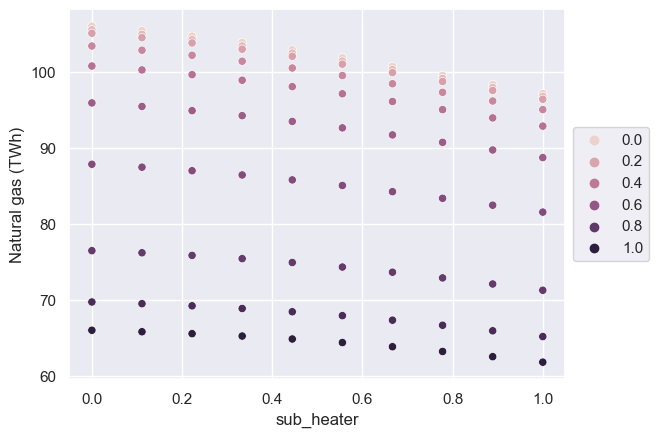

In [59]:
ax = plt.subplot(111)
sns.scatterplot(sensitivity_results, x="sub_heater", y="Natural gas (TWh)", hue="sub_insulation")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

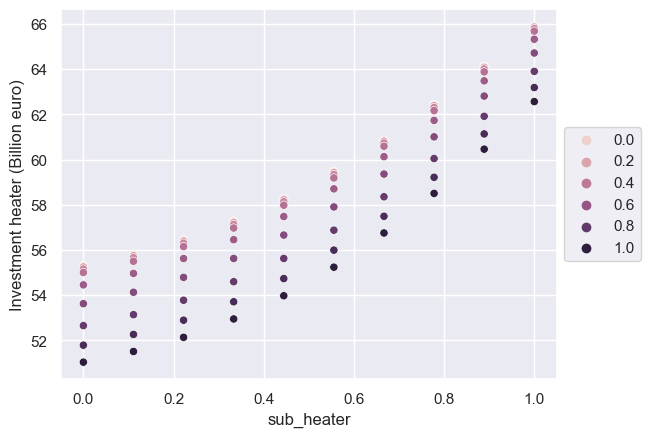

In [61]:
ax = plt.subplot(111)
sns.scatterplot(sensitivity_results, x="sub_heater", y="Investment heater (Billion euro)", hue="sub_insulation")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

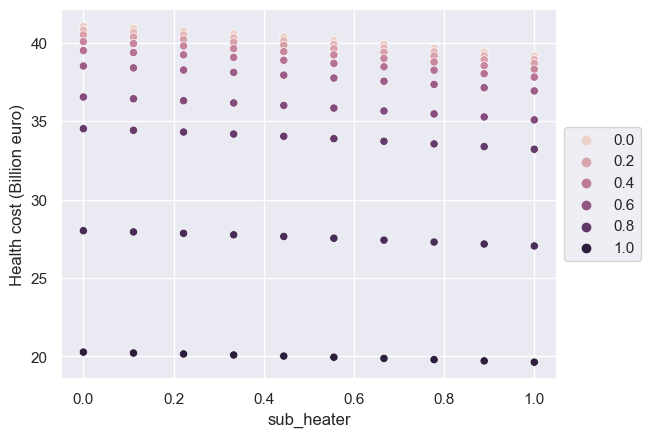

In [56]:
ax = plt.subplot(111)
sns.scatterplot(sensitivity_results, x="sub_heater", y="Health cost (Billion euro)", hue="sub_insulation")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

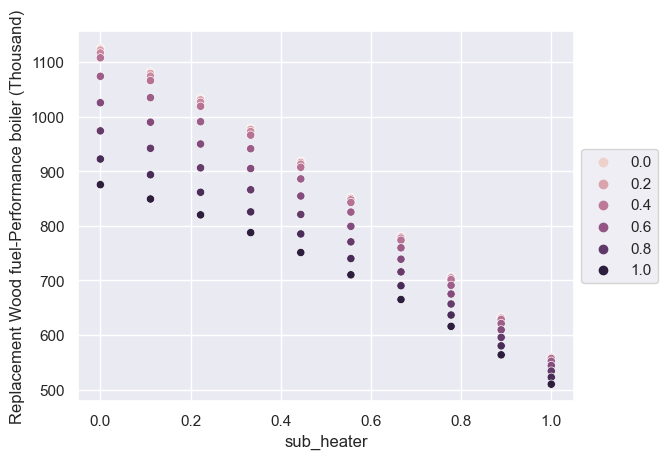

In [64]:
ax = plt.subplot(111)
sns.scatterplot(sensitivity_results, x="sub_heater", y="Replacement Wood fuel-Performance boiler (Thousand)", hue="sub_insulation")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Preliminary analysis

In [13]:
with open(os.path.join('eoles/outputs/01191007_landlord', 'coupling_results.pkl'), "rb") as file:
    output = load(file)

In [15]:
output["sub_insulation"]

[0.0, 0.0, 0.0, 0.0, 0.0]

In [12]:
with open(os.path.join('eoles/outputs/01191737_classic', 'coupling_results.pkl'), "rb") as file:
    output = load(file)
output["ResIRF replacement heater (Thousand)"] = output["replacement_heater"]
# output["ResIRF consumption (TWh)"] = output["ResIRF consumption (TWh)"] * 1e-3

In [8]:
output["Annualized system costs (Billion euro / year)"]

,Annualized electricity system costs,Annualized investment heater costs,Annualized investment insulation costs,Annualized health costs
2025,23.565378,3.539205,1.873998,1.787245
2030,25.835777,3.746701,1.597893,1.383326
2035,29.381177,3.934311,1.356779,1.059541
2040,29.768847,4.085609,1.175318,0.799160
2045,41.793401,4.199715,1.050053,0.590128


In [7]:
output["ResIRF costs (Billion euro)"]

,Heater,Insulation,Subsidies insulation,Subsidies heater,Health cost
2025,65.126978,34.484533,0.0,43.797700,32.888141
2030,68.945235,29.403764,0.0,49.396465,25.455397
2035,72.397554,24.966891,0.0,54.593051,19.497234
2040,75.181685,21.627718,0.0,58.974736,14.705816
2045,77.281406,19.322637,0.0,62.496950,10.859284


In [13]:
plot_simulation(output, save_path=os.path.join("eoles", "outputs", "01191737_classic"))

In [10]:
with open(os.path.join('eoles/outputs/01191535_classic', 'coupling_results.pkl'), "rb") as file:
    output = load(file)

# Get output
capacity_df = output["capacity"]
new_capacity_df = output["new_capacity"]
generation_df = output["generation"]
primary_generation_df = output["primary_generation"]
weighted_average_elec_price = output["weighted_average_elec_price"]
weighted_average_CH4_price = output["weighted_average_CH4_price"]
lcoe_elec = output["lcoe_elec"]
lcoe_elec_volume = output["lcoe_elec_volume"]
lcoe_elec_value = output["lcoe_elec_value"]
list_sub_heater = output["sub_heater"]
list_sub_insulation = output["sub_insulation"]
list_investment_heater = output["investment_heater_cost"]
list_investment_insulation = output["investment_insulation_cost"]
list_subsidies_heater_cost = output["investment_subsidies_heater_cost"]
list_subsidies_insulation_cost = output["investment_subsidies_insulation_cost"]
list_health_cost = output["health_cost"]
list_electricity_consumption = output["electricity_consumption"]
list_gas_consumption = output["gas_consumption"]
list_wood_consumption = output["wood_consumption"]
list_oil_consumption = output["oil_consumption"]

resirf_costs_df = pd.DataFrame({'Heater': list_investment_heater, "Insulation": list_investment_insulation, 'Subsidies insulation': list_subsidies_insulation_cost,
                                'Subsidies heater': list_subsidies_heater_cost, "Health cost": list_health_cost},
index=[2025, 2030, 2035, 2040, 2045])

resirf_consumption_df = pd.DataFrame({'Electricity': list_electricity_consumption, "Natural gas": list_gas_consumption, 'Oil fuel': list_oil_consumption,
                                'Wood fuel': list_wood_consumption},
index=[2025, 2030, 2035, 2040, 2045])

price_df = pd.DataFrame({'Average electricity price': weighted_average_elec_price.T.squeeze().tolist(),
                         'Average CH4 price': weighted_average_CH4_price.T.squeeze().tolist(), 'LCOE electricity': lcoe_elec.T.squeeze().tolist(),
                         'LCOE electricity value': lcoe_elec_value.T.squeeze().tolist(),
                         'LCOE electricity volume': lcoe_elec_volume.T.squeeze().tolist()}, index=[2025, 2030, 2035, 2040, 2045])

output_test = {
        "Capacities (GW)": output["capacity"],
        "New capacities (GW)": output["new_capacity"],
        "Generation (TWh)": output["generation"],
        "Primary generation (TWh)": output["primary_generation"],
        "Charging capacity (GW)": output["charging_capacity"],
        "Energy capacity (GW)": output["energy_capacity"],
        "Prices (€/MWh)": price_df,
        "Subvention heater": output["sub_heater"],
        "Subvention insulation": output["sub_insulation"],
        "ResIRF costs (Billion euro)": resirf_costs_df,
        "ResIRF consumption (TWh)": resirf_consumption_df,
        "replacement_heater": None
        # "stock_heater": stock_heater_df
    }


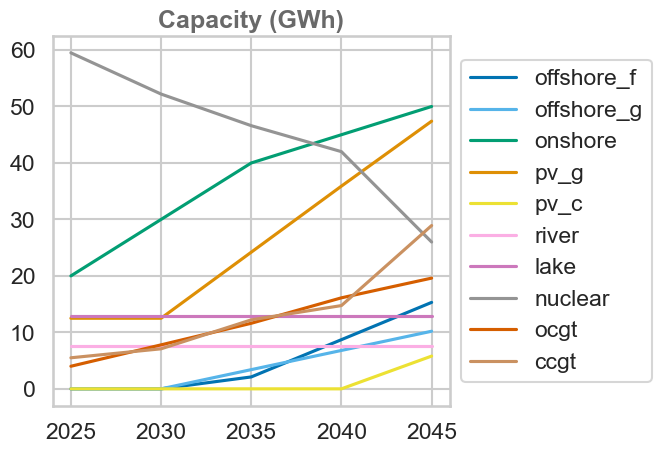

In [3]:
elec_generation = ["offshore_f", "offshore_g", "onshore", "pv_g", "pv_c", "river", "lake", "nuclear", "ocgt",
                   "ccgt"]
make_line_plot(capacity_df.T, subset=elec_generation, y_label="Capacity (GWh)",
               colors=resources_data["colors_eoles"],
               save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

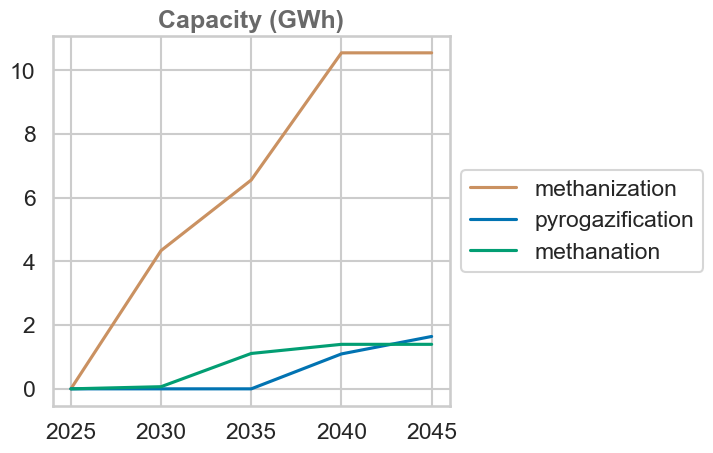

In [4]:
CH4_generation = ["methanization", "pyrogazification", "methanation"]
make_line_plot(capacity_df.T, subset=CH4_generation, y_label="Capacity (GWh)",
               colors=resources_data["colors_eoles"],
               save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

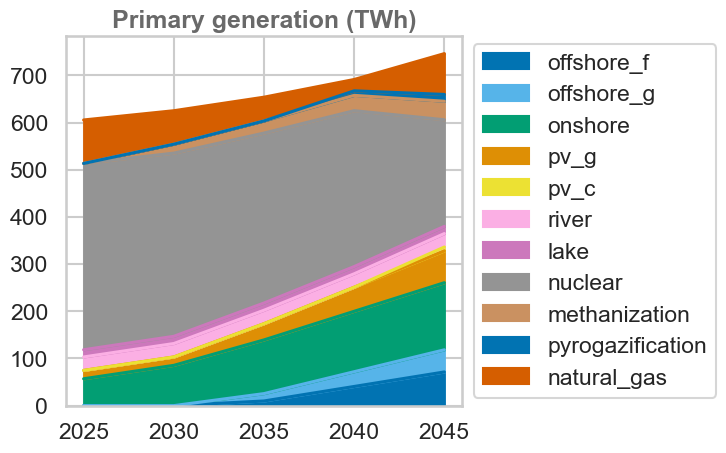

In [5]:
make_area_plot(primary_generation_df.T, y_label="Primary generation (TWh)", colors=resources_data["colors_eoles"],
               save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

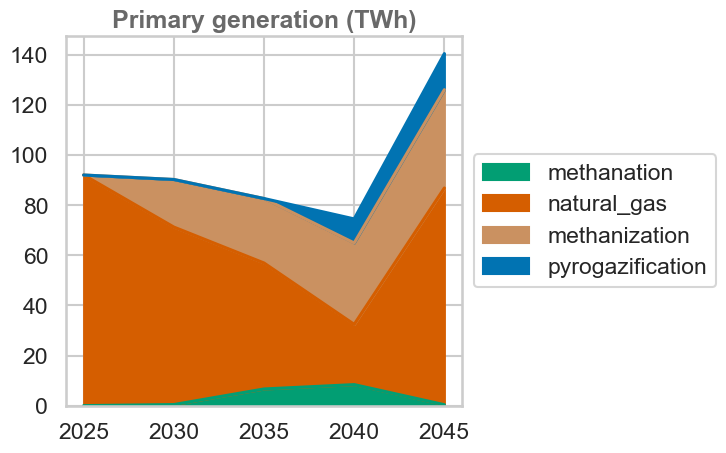

In [6]:
CH4_generation = ["methanation", "natural_gas", "methanization", "pyrogazification"]
make_area_plot(generation_df.T, subset=CH4_generation, y_label="Primary generation (TWh)", colors=resources_data["colors_eoles"],
               save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

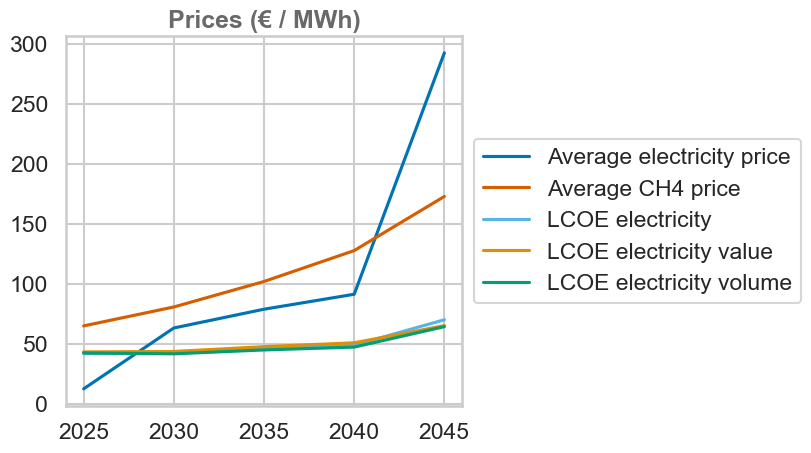

In [7]:
make_line_plot(price_df, y_label="Prices (€ / MWh)", colors=resources_data["colors_eoles"],
               save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

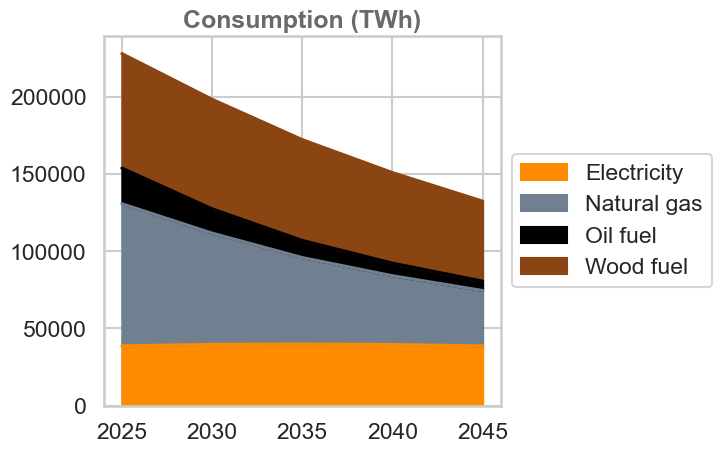

In [8]:
make_area_plot(resirf_consumption_df, y_label="Consumption (TWh)", colors=resources_data["colors_resirf"],
               save=None, format_y=lambda y, _: '{:.0f}'.format(y))

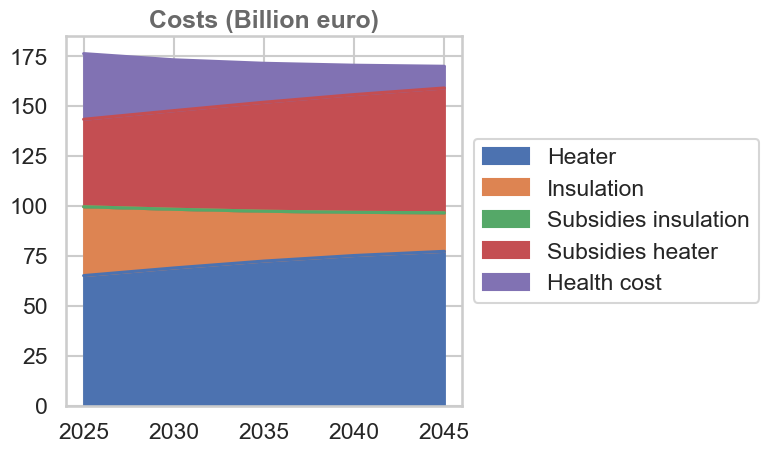

In [12]:
make_area_plot(resirf_costs_df, y_label="Costs (Billion euro)", save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

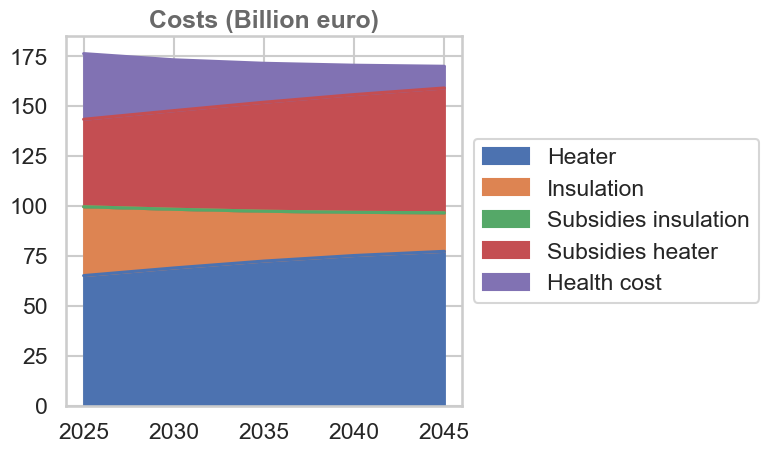

In [9]:
make_area_plot(resirf_costs_df, y_label="Costs (Billion euro)", save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

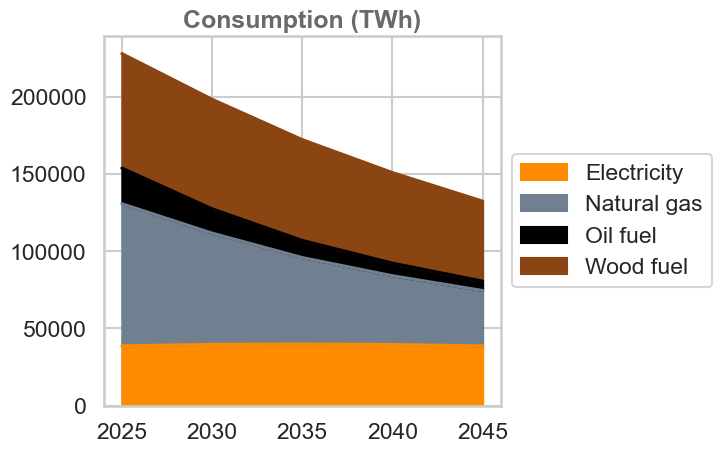

In [15]:
make_area_plot(resirf_consumption_df, y_label="Consumption (TWh)", colors=resources_data["colors_resirf"], save=None, format_y=lambda y, _: '{:.0f}'.format(y))

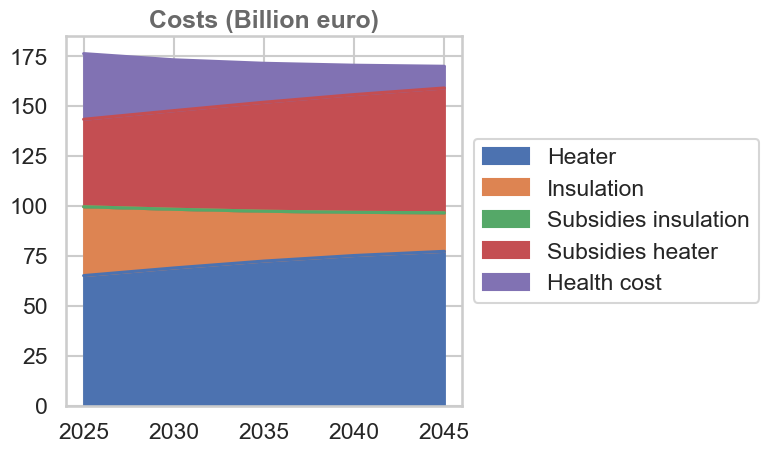

In [18]:
make_area_plot(resirf_costs_df, y_label="Costs (Billion euro)", save=None, format_y=lambda y, _: '{:.0f}'.format(y))

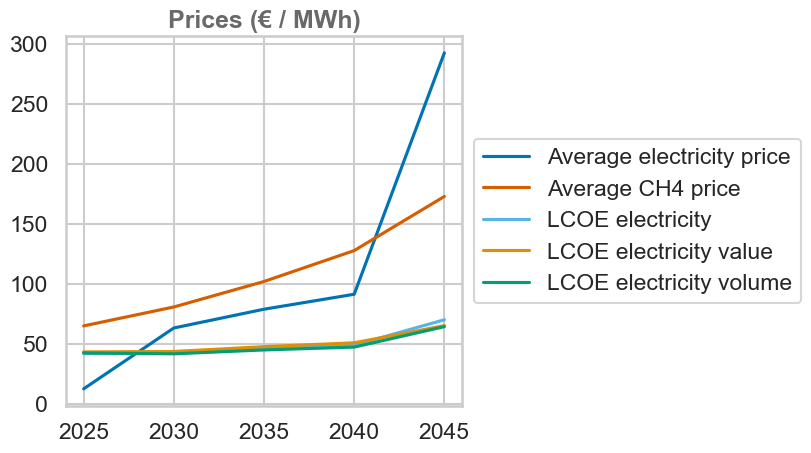

In [3]:
make_line_plot(price_df, y_label="Prices (€ / MWh)", colors=resources_data["colors_eoles"], save=None, format_y=lambda y, _: '{:.0f}'.format(y))

In [80]:
capacity_df

,2025,2030,2035,2040,2045
river,7.500000,7.500000,7.500000,7.500000,7.500000
lake,12.855000,12.855000,12.855000,12.855000,12.855000
phs,5.200000,5.200000,5.700000,6.200000,6.700000
offshore_f,0.000000,0.000000,2.108245,8.708245,15.308245
offshore_g,0.000000,0.000000,3.400000,6.800000,10.200000
onshore,20.000000,30.000000,40.000000,45.000000,50.000000
onshore_V110,NaN,NaN,NaN,NaN,NaN
pv_g,12.500000,12.500000,24.200000,35.900000,47.400000
pv_g_ns,NaN,NaN,NaN,NaN,NaN
pv_c,0.000000,0.000000,0.000000,0.000000,5.800000


In [79]:
list_investment_insulation

[34.48453258705485,
 29.403763538331912,
 24.966891454046777,
 21.627718489893365,
 19.322637103523]

## Subsidy

## Capacity

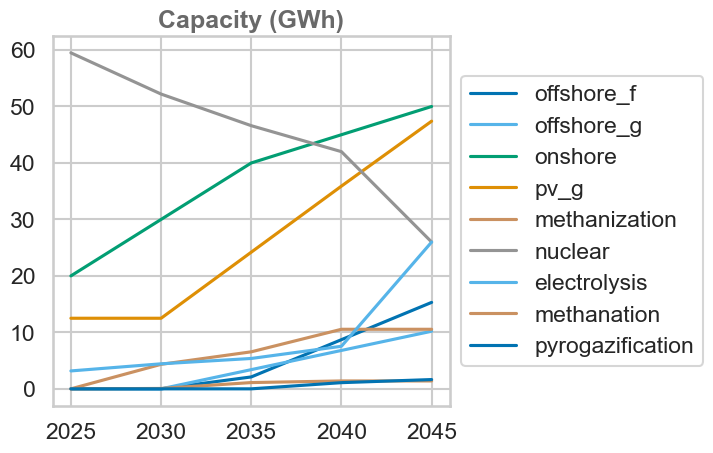

In [5]:
make_line_plot(capacity_df.T, y_label="Capacity (GWh)", colors=resources_data["colors_eoles"], save=None, format_y=lambda y, _: '{:.0f}'.format(y),
               subset=["offshore_f", "offshore_g", "onshore", "pv_g", "methanization", "nuclear", "electrolysis", "methanation", "pyrogazification"])

In [ ]:
fig = plt.figure()
ax = primary_generation_df.T.plot.area()
ax.set_ylabel("Yearly primary production in TWh")
ax.set_xlabel("Year")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Text(0.5, 1.0, 'Capacities (GW)')

<Figure size 640x480 with 0 Axes>

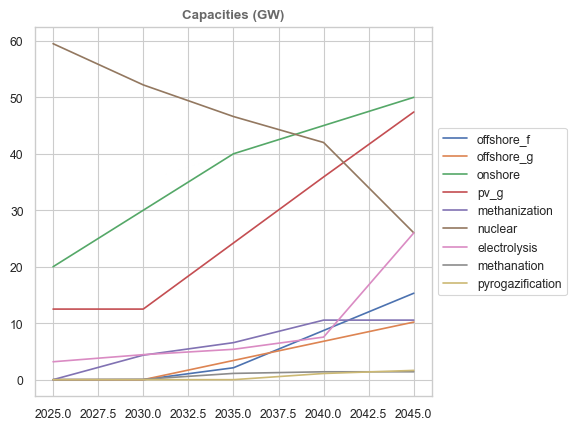

In [10]:
sns.set_theme(context="paper", style="whitegrid")
fig = plt.figure()
ax = capacity_df.T[["offshore_f", "offshore_g", "onshore", "pv_g", "methanization", "nuclear", "electrolysis", "methanation", "pyrogazification"]].plot.line()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Capacities (GW)")

Text(0.5, 1.0, 'Capacities (GW)')

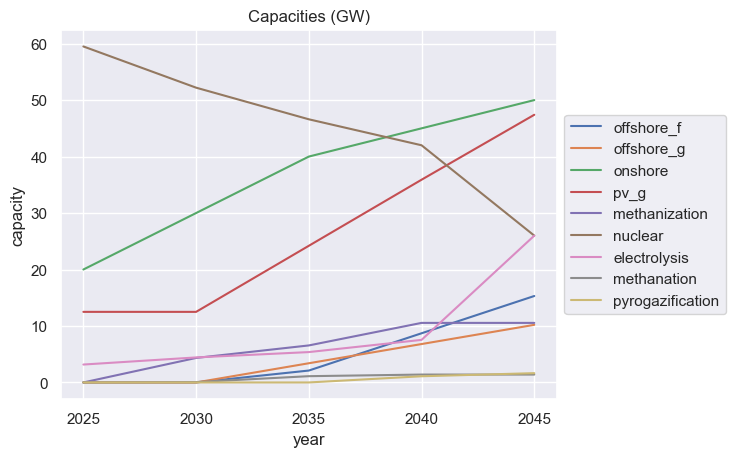

In [70]:
tmp = capacity_df.transpose().stack().reset_index().rename(columns={'level_0': 'year', 'level_1': 'technology', 0: 'capacity'})
tmp['year'] = tmp['year'].apply(str)
tmp = tmp.loc[tmp.technology.isin(["offshore_f", "offshore_g", "onshore", "pv_g", "methanization", "nuclear", "electrolysis", "methanation", "pyrogazification"])]
fig = plt.figure()
ax = plt.subplot(111)
sns.lineplot(tmp, x="year", y="capacity", hue="technology")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Capacities (GW)")

Text(0.5, 1.0, 'Capacities (GW)')

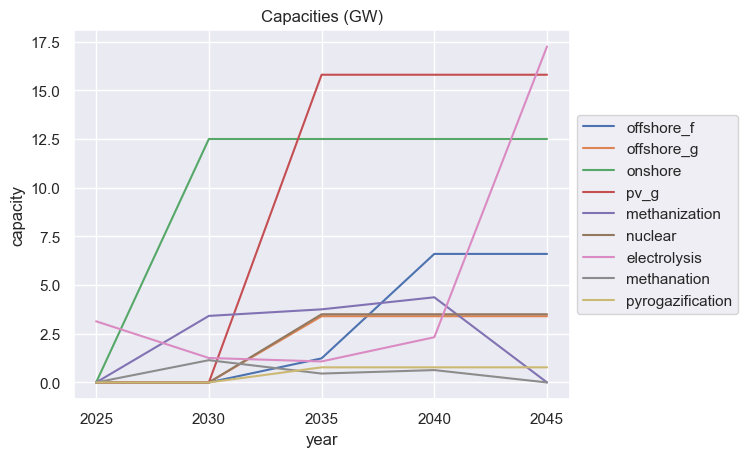

In [26]:
tmp = new_capacity_df.transpose().stack().reset_index().rename(columns={'level_0': 'year', 'level_1': 'technology', 0: 'capacity'})
tmp['year'] = tmp['year'].apply(str)
tmp = tmp.loc[tmp.technology.isin(["offshore_f", "offshore_g", "onshore", "pv_g", "methanization", "nuclear", "electrolysis", "methanation", "pyrogazification"])]
fig = plt.figure()
ax = plt.subplot(111)
sns.lineplot(tmp, x="year", y="capacity", hue="technology")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Capacities (GW)")

## Generation

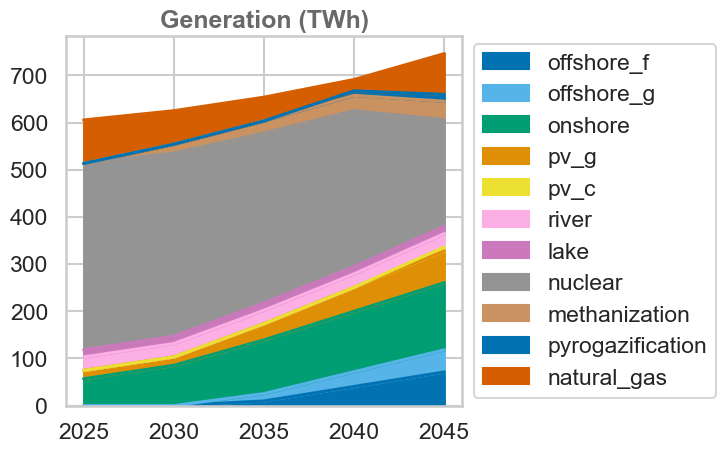

In [4]:
make_area_plot(primary_generation_df.T, y_label="Generation (TWh)", colors=resources_data["colors_eoles"], save=None, format_y=lambda y, _: '{:.0f}'.format(y))

In [4]:
primary_generation_df.T.index

Int64Index([2025, 2030, 2035, 2040, 2045], dtype='int64')

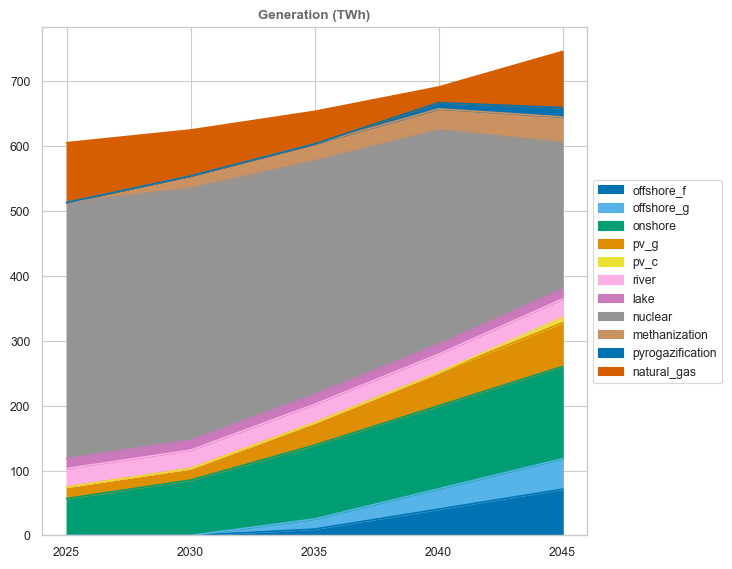

In [3]:
make_area_plot(primary_generation_df.T, y_label="Generation (TWh)", colors=resources_data["colors_eoles"], save=None, format_y=lambda y, _: '{:.0f}'.format(y))

<Figure size 640x480 with 0 Axes>

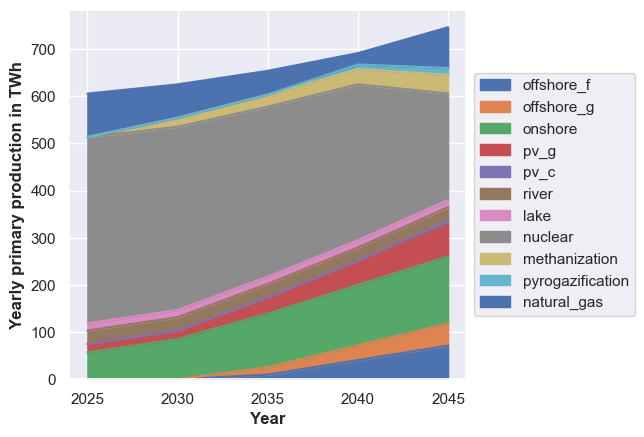

In [4]:
fig = plt.figure()
ax = primary_generation_df.T.plot.area()
ax.set_ylabel("Yearly primary production in TWh")
ax.set_xlabel("Year")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [14]:
l = ax.get_lines()[0]

In [17]:
l.__dict__.keys()

dict_keys(['_stale', 'stale_callback', '_axes', 'figure', '_transform', '_transformSet', '_visible', '_animated', '_alpha', 'clipbox', '_clippath', '_clipon', '_label', '_picker', '_rasterized', '_agg_filter', '_mouseover', '_callbacks', '_remove_method', '_url', '_gid', '_snap', '_sketch', '_path_effects', '_sticky_edges', '_in_layout', '_dashcapstyle', '_dashjoinstyle', '_solidjoinstyle', '_solidcapstyle', '_linestyles', '_drawstyle', '_linewidth', '_dashSeq', '_dashOffset', '_us_dashSeq', '_us_dashOffset', '_linestyle', '_invalidx', '_color', '_marker', '_markevery', '_markersize', '_antialiased', '_markeredgecolor', '_markeredgewidth', '_markerfacecolor', '_markerfacecoloralt', '_pickradius', 'ind_offset', '_xorig', '_yorig', '_invalidy', '_x', '_y', '_xy', '_path', '_transformed_path', '_subslice', '_x_filled'])

In [20]:
l._color

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

<Figure size 640x480 with 0 Axes>

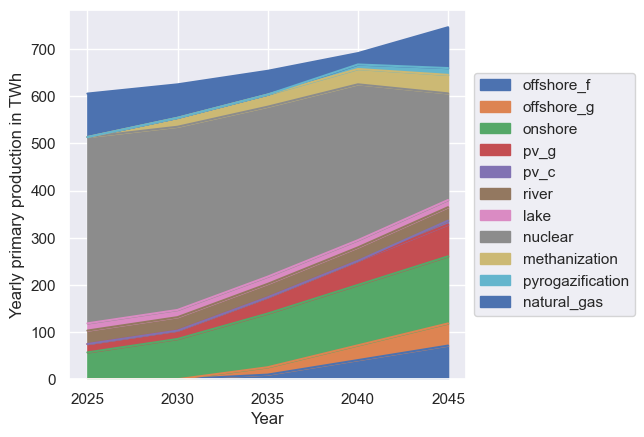

In [72]:
fig = plt.figure()
ax = primary_generation_df.T.plot.area()
ax.set_ylabel("Yearly primary production in TWh")
ax.set_xlabel("Year")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<Figure size 640x480 with 0 Axes>

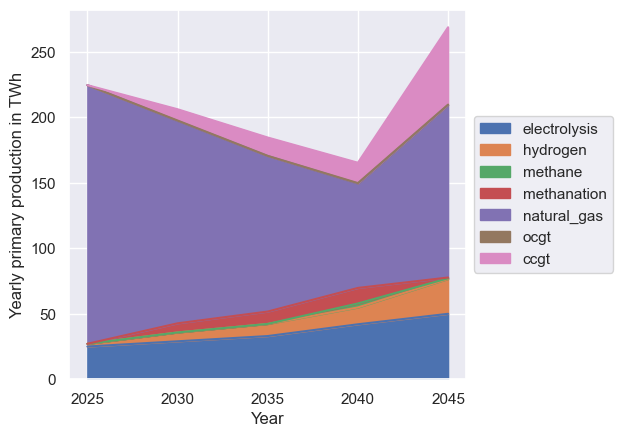

In [23]:
fig = plt.figure()
ax = generation_df.T[["electrolysis", "hydrogen", "methane", "methanation", "natural_gas", "ocgt", "ccgt"]].plot.area()
ax.set_ylabel("Yearly primary production in TWh")
ax.set_xlabel("Year")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Investment ResIRF

## LCOE

In [6]:
lcoe_df = pd.concat([weighted_average_elec_price.rename(index={0 : "average_elec_price"}), lcoe_elec.rename(index={0 : "lcoe_elec"}),
                     lcoe_elec_volume.rename(index={0 : "lcoe_elec_volume"}), lcoe_elec_value.rename(index={0 : "lcoe_elec_value"})], axis=0)
lcoe_df

,2025,2030,2035,2040,2045
average_elec_price,12.435117,63.123545,78.759956,91.221633,292.322307
lcoe_elec,41.788400,41.988947,45.558773,48.804156,69.983341
lcoe_elec_volume,42.333278,41.609347,44.830620,47.219085,64.231817
lcoe_elec_value,43.197074,43.563736,47.550866,50.778867,65.089394


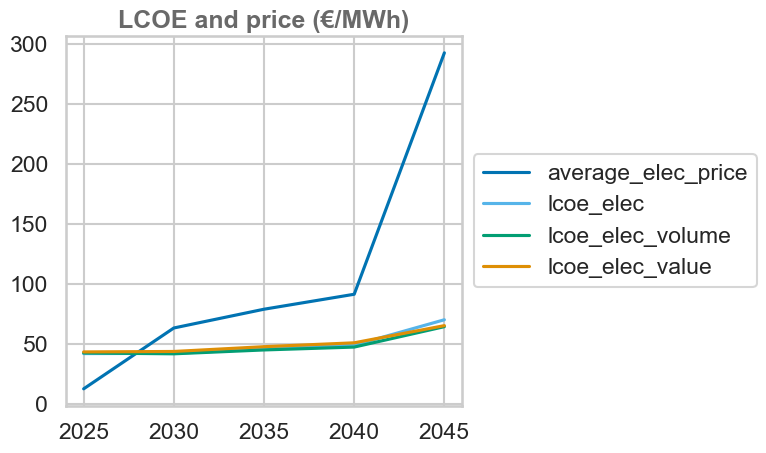

In [8]:
make_line_plot(lcoe_df.T, y_label="LCOE and price (€/MWh)", colors=resources_data["colors_eoles"], save=None, format_y=lambda y, _: '{:.0f}'.format(y))

Text(0, 0.5, 'LCOE and average elec price (€/MWh)')

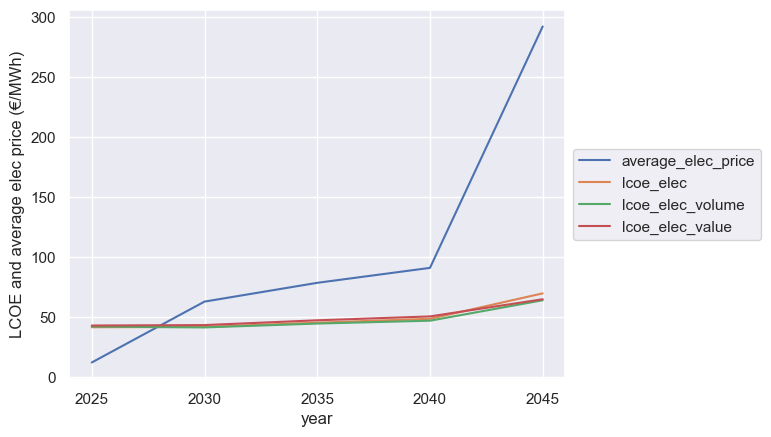

In [71]:
lcoe_df = pd.concat([weighted_average_elec_price.rename(index={0 : "average_elec_price"}), lcoe_elec.rename(index={0 : "lcoe_elec"}),
                     lcoe_elec_volume.rename(index={0 : "lcoe_elec_volume"}), lcoe_elec_value.rename(index={0 : "lcoe_elec_value"})], axis=0)
lcoe_df = lcoe_df.T.reset_index().rename(columns={"index": "year"})
lcoe_df['year'] = lcoe_df['year'].apply(str)

fig = plt.figure()
ax = plt.subplot(111)
sns.lineplot(lcoe_df, x="year", y="average_elec_price", label="average_elec_price")
# sns.lineplot(lcoe_df, x="year", y="average_CH4_price", label="average_CH4_price")
sns.lineplot(lcoe_df, x="year", y="lcoe_elec", label="lcoe_elec")
sns.lineplot(lcoe_df, x="year", y="lcoe_elec_volume", label="lcoe_elec_volume")
sns.lineplot(lcoe_df, x="year", y="lcoe_elec_value", label="lcoe_elec_value")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("LCOE and average elec price (€/MWh)")